In [ ]:
# [Step 1] 구글 드라이브 연결 및 작업 폴더 생성
# 이 코드를 첫 번째 셀에 넣고 실행하세요.

import os
from google.colab import drive

# 1. 드라이브 마운트 (인증 창이 뜨면 승인해주세요)
drive.mount('/content/drive')

# 2. 작업할 폴더 경로 설정 (원하는 이름으로 변경 가능)
project_folder = '/content/drive/MyDrive/Solar_Project'

# 3. 폴더가 없으면 생성하고 이동
if not os.path.exists(project_folder):
    os.makedirs(project_folder)
    print(f"새 폴더를 생성했습니다: {project_folder}")
else:
    print(f"기존 폴더를 사용합니다: {project_folder}")

os.chdir(project_folder)
print(f"현재 작업 경로: {os.getcwd()}")

!nvidia-smi

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
기존 폴더를 사용합니다: /content/drive/MyDrive/Solar_Project
현재 작업 경로: /content/drive/MyDrive/Solar_Project
Wed Jan 28 18:51:45 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A

In [ ]:
# [Step 2] 데이터셋 다운로드
# Step 1을 실행한 뒤, 이 코드를 두 번째 셀에 넣고 실행하세요.

import os

# 1. GitHub 저장소 클론 (이미 다운로드 받았다면 건너뜀)
# -> 여기서는 '요리책(모델 코드)'만 가져옵니다.
repo_url = "https://github.com/yuhao-nie/Stanford-solar-forecasting-dataset.git"
repo_name = "Stanford-solar-forecasting-dataset"

if not os.path.exists(repo_name):
    print(f"GitHub 저장소를 다운로드합니다: {repo_url}")
    # 리눅스 명령어 실행을 위해 os.system 사용 (Colab에서는 !git clone ...과 동일)
    os.system(f"git clone {repo_url}")
else:
    print("이미 GitHub 저장소가 존재합니다. 다운로드를 건너뜁니다.")

# 2. 저장소 폴더로 이동
os.chdir(repo_name)
print(f"현재 경로 이동 완료: {os.getcwd()}")

# 3. 실제 데이터 파일(HDF5) 다운로드
# [중요] GitHub에는 용량 제한(100MB) 때문에 '사진 데이터'가 들어있지 않습니다.
# 따라서 연구자가 별도로 올려둔 서버에서 데이터를 '따로' 받아야 합니다.

# 다운로드 받고자 하는 파일명 (저장될 이름)
save_filename = "2017_2019_images_pv_processed.hdf5"

# 실제 데이터 다운로드 주소 (GitHub README에서 찾아서 여기에 복사 붙여넣기 해야 함)
# 예: "https://purl.stanford.edu/..." 형식의 주소
data_url = "https://stacks.stanford.edu/file/dj417rh1007/2017_2019_images_pv_processed.hdf5"

if not os.path.exists(save_filename):
    print(f"'{save_filename}' 파일이 없습니다. 다운로드를 시도합니다...")

    # URL이 입력되지 않았을 경우 안내 메시지 출력
    if "여기에" in data_url or data_url == "":
        print("\n" + "="*50)
        print("⚠️ [안내] 데이터 다운로드 링크가 설정되지 않았습니다!")
        print("1. https://github.com/Yuhao-Nie/SKIPPD 사이트의 README를 읽어보세요.")
        print("2. 'Dataset Download' 관련 링크를 복사해서 위 코드의 'data_url'에 넣으세요.")
        print("3. [가장 쉬운 방법] 링크 찾기가 어렵다면, PC에 있는 데이터 파일을")
        print("   왼쪽 파일 탐색기의 'SKIPPD' 폴더 안으로 직접 드래그해서 넣으세요.")
        print("="*50 + "\n")
    else:
        # 링크가 있다면 wget 명령어로 다운로드 수행
        print(f"데이터를 다운로드 중입니다... ({data_url})")
        os.system(f"wget -O {save_filename} {data_url}")
        print("다운로드 완료!")
else:
    print(f"✅ 데이터 파일이 이미 준비되어 있습니다: {save_filename}")

이미 GitHub 저장소가 존재합니다. 다운로드를 건너뜁니다.
현재 경로 이동 완료: /content/drive/MyDrive/Solar_Project/Stanford-solar-forecasting-dataset
✅ 데이터 파일이 이미 준비되어 있습니다: 2017_2019_images_pv_processed.hdf5


✅ '2017_2019_images_pv_processed.hdf5' 파일을 로드합니다...

[1] 최상위 폴더(Group) 목록: ['test', 'trainval']

📂 'trainval' 폴더 내부를 확인합니다:
   내부 파일 목록: ['images_log', 'pv_log']
   ✅ 이미지(images_log) 발견! 형태: (349372, 64, 64, 3)


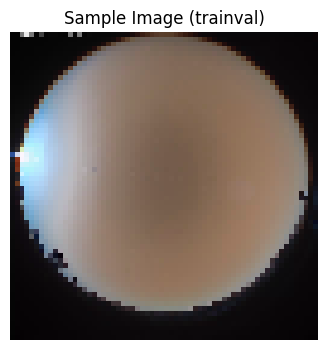

   ✅ 발전량(pv_log) 발견! 형태: (349372,)
   값 예시(상위 5개): [0.05569101 0.08876321 0.10917138 0.12320565 0.15974765]

📂 'test' 폴더 내부를 확인합니다:
   내부 파일 목록: ['images_log', 'pv_log']
   ✅ 이미지(images_log) 발견! 형태: (14003, 64, 64, 3)
   ✅ 발전량(pv_log) 발견! 형태: (14003,)
   값 예시(상위 5개): [0.04631056 0.06190734 0.0738412  0.08070637 0.09189038]


In [ ]:
# [Step 3] 데이터 로드 및 내용 확인
# 데이터 파일이 준비된 상태에서 세 번째 셀에 넣고 실행하세요.

import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# 로드할 파일명
target_file = '2017_2019_images_pv_processed.hdf5'

# 파일 존재 여부 확인
if not os.path.exists(target_file):
    print(f"❌ 오류: '{target_file}' 파일을 찾을 수 없습니다.")
    print(f"현재 경로({os.getcwd()})에 파일이 있는지 확인하거나 파일명을 수정해주세요.")
else:
    print(f"✅ '{target_file}' 파일을 로드합니다...")

    try:
        with h5py.File(target_file, 'r') as f:
            # 1. 최상위 구조 확인 (예: trainval, test 폴더가 보여야 함)
            print(f"\n[1] 최상위 폴더(Group) 목록: {list(f.keys())}")

            # 2. 'trainval' (학습용)과 'test' (테스트용) 각각 들어가서 확인
            for group_name in ['trainval', 'test']:
                if group_name in f.keys():
                    print(f"\n📂 '{group_name}' 폴더 내부를 확인합니다:")
                    group = f[group_name] # 폴더로 진입

                    # 폴더 안의 내용물(키) 출력
                    print(f"   내부 파일 목록: {list(group.keys())}")

                    # 2-1. 이미지 데이터 확인 (images_log)
                    if 'images_log' in group.keys():
                        images = group['images_log']
                        print(f"   ✅ 이미지(images_log) 발견! 형태: {images.shape}")

                        # 훈련용('trainval')인 경우에만 샘플 사진 보여주기
                        if group_name == 'trainval':
                            plt.figure(figsize=(4, 4))
                            plt.imshow(images[0]) # 첫 번째 사진
                            plt.title(f"Sample Image ({group_name})")
                            plt.axis('off')
                            plt.show()
                    else:
                        print(f"   ⚠️ '{group_name}' 안에 이미지 데이터가 없습니다.")

                    # 2-2. 발전량 데이터 확인 (pv_log)
                    if 'pv_log' in group.keys():
                        power = group['pv_log']
                        print(f"   ✅ 발전량(pv_log) 발견! 형태: {power.shape}")
                        # 데이터 살짝 출력
                        print(f"   값 예시(상위 5개): {power[:5]}")
                    else:
                        print(f"   ⚠️ '{group_name}' 안에 발전량 데이터가 없습니다.")

                else:
                    print(f"\n⚠️ '{group_name}' 폴더가 파일 안에 없습니다.")

    except Exception as e:
        print(f"\n❌ 파일을 읽는 중 오류가 발생했습니다: {e}")

In [ ]:
import shutil
import os

source_path = '/content/drive/MyDrive/Solar_Project/Stanford-solar-forecasting-dataset/2017_2019_images_pv_processed.hdf5'
local_path = '/content/2017_2019_images_pv_processed.hdf5'

if os.path.exists(source_path) and not os.path.exists(local_path):
    print("📦 데이터를 로컬 디스크로 복사 중... (약 1~2분 소요)")
    shutil.copy(source_path, local_path)
    print("✅ 복사 완료! 이제 학습 속도가 빨라집니다.")
else:
    print("⚠️ 파일 경로를 확인해주세요. 이미 복사되었거나 원본 파일이 없습니다.")

📦 데이터를 로컬 디스크로 복사 중... (약 1~2분 소요)
✅ 복사 완료! 이제 학습 속도가 빨라집니다.


🚀 메모리 절약 모드로 학습 준비 중... (데이터: 349372개 사용)

🔥 학습 시작! (이 방식은 램을 적게 씁니다)
Epoch 1/5
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 292s 33ms/step - loss: 13.4315 - mae: 1.5528 - val_loss: 0.8169 - val_mae: 0.4229
Epoch 2/5
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 251s 29ms/step - loss: 1.9451 - mae: 0.5965 - val_loss: 0.8384 - val_mae: 0.4450
Epoch 3/5
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 249s 28ms/step - loss: 1.8674 - mae: 0.5782 - val_loss: 0.7265 - val_mae: 0.3171
Epoch 4/5
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 288s 33ms/step - loss: 1.8177 - mae: 0.5513 - val_loss: 0.7908 - val_mae: 0.4296
Epoch 5/5
8734/8734 ━━━━━━━━━━━━━━━━━━━━ 270s 31ms/step - loss: 1.7401 - mae: 0.5351 - val_loss: 1.0022 - val_mae: 0.6198

✅ 학습 완료!


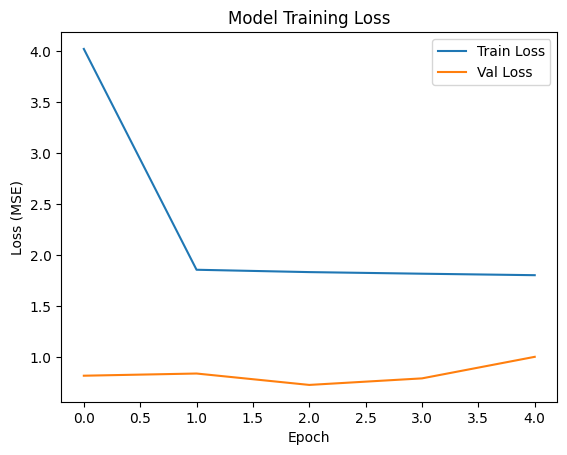

In [ ]:
# [Step 4] (메모리 절약형) 데이터 제너레이터 및 모델 학습
# ★ 실행 전 상단 [런타임] -> [세션 다시 시작]을 눌러 램을 비워주세요! ★
# 이 코드를 네 번째 셀에 넣고 실행하세요.

import os
import h5py
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Concatenate, TimeDistributed, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# ---------------------------------------------------------
# 1. 메모리 절약형 데이터 로더 (Data Generator) 정의
# ---------------------------------------------------------
# 이 클래스는 데이터를 한꺼번에 램에 올리지 않고,
# 학습할 때마다 조금씩(batch_size만큼) 파일에서 읽어옵니다.
class SolarDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, hdf5_path, subset, indices, seq_length, batch_size=32):
        super().__init__() # [수정] 최신 Keras 호환성을 위해 부모 클래스 초기화 필수
        self.file_path = hdf5_path
        self.subset = subset # 'trainval' 또는 'test'
        self.indices = indices # 사용할 데이터 인덱스 리스트
        self.seq_length = seq_length
        self.batch_size = batch_size
        self.prediction_horizon = 1 # 1분 뒤 예측

    def __len__(self):
        # 한 에폭(Epoch)당 배치가 몇 번 도는지 계산
        return int(len(self.indices) / self.batch_size)

    def __getitem__(self, index):
        # 배치(Batch) 하나만큼의 인덱스를 가져옴
        batch_indices = self.indices[index * self.batch_size : (index + 1) * self.batch_size]

        X_img_batch = []
        X_num_batch = []
        y_batch = []

        # 파일을 열어서 필요한 부분만 쏙 빼옴
        with h5py.File(self.file_path, 'r') as f:
            img_dataset = f[self.subset]['images_log']
            num_dataset = f[self.subset]['pv_log']

            for i in batch_indices:
                # 1. 이미지 시퀀스 (i ~ i+10)
                # 데이터가 연속되어 있으므로 슬라이싱으로 가져옴
                imgs = img_dataset[i : i + self.seq_length]
                # 정규화 (0~1)
                imgs = imgs.astype('float32') / 255.0
                X_img_batch.append(imgs)

                # 2. 수치 데이터 시퀀스
                nums = num_dataset[i : i + self.seq_length]
                X_num_batch.append(nums.reshape(-1, 1))

                # 3. 정답 (미래 값)
                target_idx = i + self.seq_length + self.prediction_horizon
                # 범위 체크 (데이터 끝을 넘어가면 마지막 값을 씀)
                if target_idx >= len(num_dataset):
                    target_idx = len(num_dataset) - 1
                y_batch.append(num_dataset[target_idx])

        # [수정] 리스트([]) 대신 튜플(())로 반환해야 최신 TF 버전에서 에러가 안 남
        return (np.array(X_img_batch), np.array(X_num_batch)), np.array(y_batch)

# ---------------------------------------------------------
# 2. 설정 및 데이터 인덱스 준비
# ---------------------------------------------------------
target_file = '2017_2019_images_pv_processed.hdf5'
SEQ_LENGTH = 10     # 과거 10장을 보고
BATCH_SIZE = 32     # 한 번에 32문제씩 풂
TOTAL_DATA_LIMIT = 349372 # ★학습에 쓸 데이터 개수 (메모리 걱정 없이 늘려도 됨!)

if not os.path.exists(target_file):
    print("❌ 데이터 파일이 없습니다. Step 2를 다시 실행해주세요.")
else:
    print(f"🚀 메모리 절약 모드로 학습 준비 중... (데이터: {TOTAL_DATA_LIMIT}개 사용)")

    # 학습용/검증용 인덱스 나누기 (8:2)
    all_indices = np.arange(TOTAL_DATA_LIMIT)
    split_point = int(TOTAL_DATA_LIMIT * 0.8)

    train_indices = all_indices[:split_point]
    val_indices = all_indices[split_point:]

    # 제너레이터 생성
    train_gen = SolarDataGenerator(target_file, 'trainval', train_indices, SEQ_LENGTH, BATCH_SIZE)
    val_gen = SolarDataGenerator(target_file, 'trainval', val_indices, SEQ_LENGTH, BATCH_SIZE)

    # ---------------------------------------------------------
    # 3. 모델 정의 (CNN + LSTM)
    # ---------------------------------------------------------
    def create_model():
        img_in = Input(shape=(SEQ_LENGTH, 64, 64, 3))

        # CNN (이미지 특징 추출)
        x1 = TimeDistributed(Conv2D(16, (3, 3), activation='relu'))(img_in)
        x1 = TimeDistributed(MaxPooling2D((2, 2)))(x1)
        x1 = TimeDistributed(Flatten())(x1)
        x1 = LSTM(32, return_sequences=False)(x1)

        # 수치 데이터 처리
        num_in = Input(shape=(SEQ_LENGTH, 1))
        x2 = LSTM(16, return_sequences=False)(num_in)

        # 결합
        merged = Concatenate()([x1, x2])
        z = Dense(32, activation='relu')(merged)
        output = Dense(1)(z)

        model = Model(inputs=[img_in, num_in], outputs=output)
        model.compile(optimizer='adam', loss='mse', metrics=['mae'])
        return model

    model = create_model()

    # ---------------------------------------------------------
    # 4. 학습 시작 (fit_generator)
    # ---------------------------------------------------------
    print("\n🔥 학습 시작! (이 방식은 램을 적게 씁니다)")
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=5,
        callbacks=[EarlyStopping(patience=2, monitor='val_loss')]
    )

    print("\n✅ 학습 완료!")

    # 결과 그래프
    import matplotlib.pyplot as plt
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Model Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.show()

🧪 테스트 데이터를 불러옵니다... (구간: 7000 ~ 7500)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


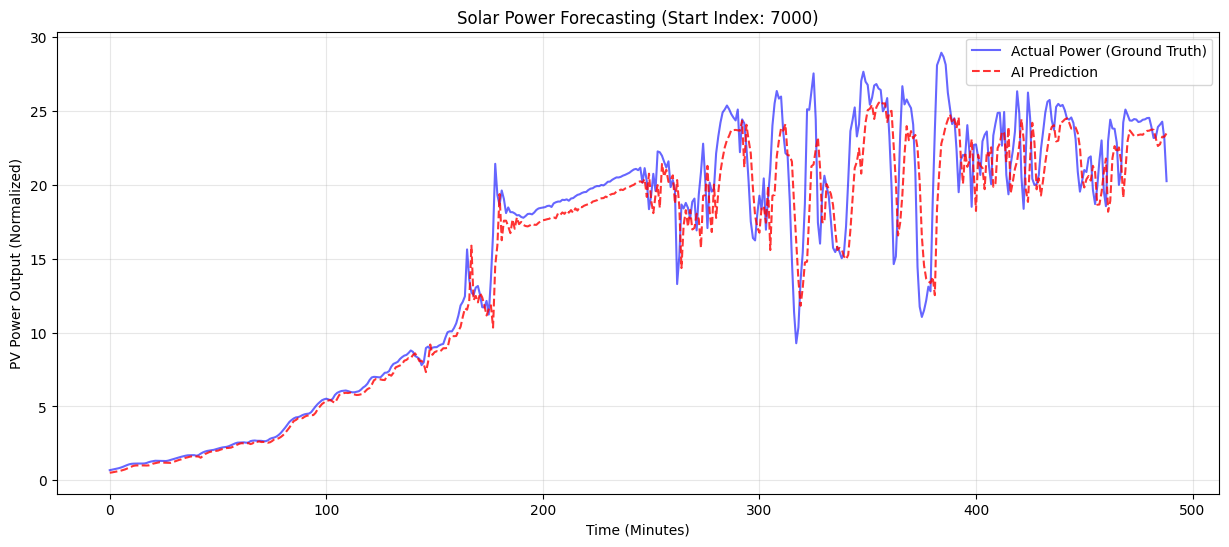


[성능 평가]
평균 오차(MAE): 1.5056
제곱근 오차(RMSE): 2.4029
🧪 테스트 데이터를 불러옵니다... (구간: 7500 ~ 8000)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


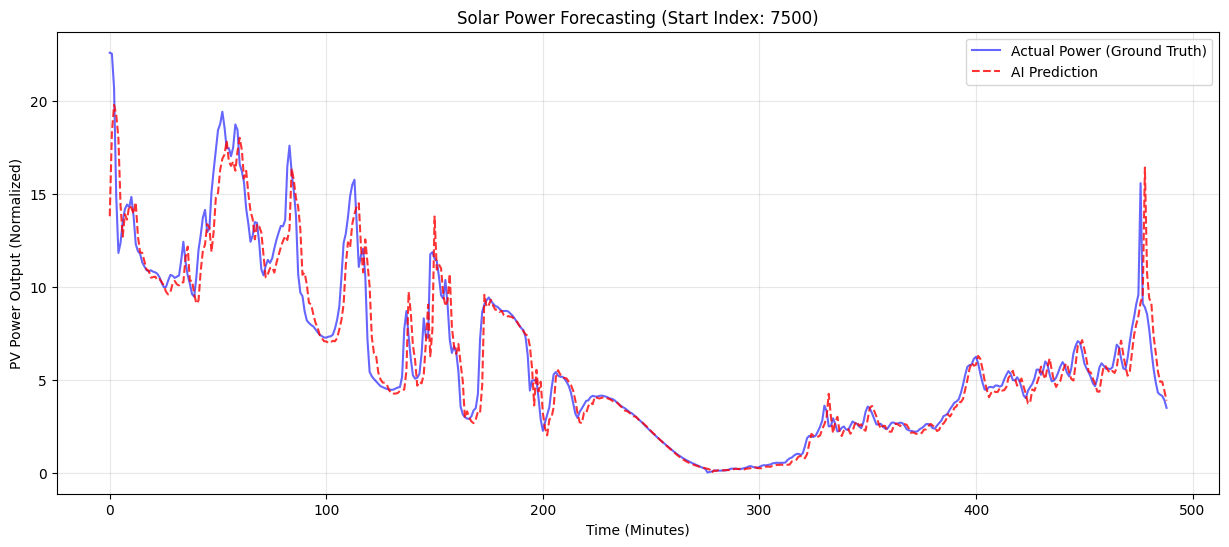


[성능 평가]
평균 오차(MAE): 0.7271
제곱근 오차(RMSE): 1.3019
🧪 테스트 데이터를 불러옵니다... (구간: 8000 ~ 8500)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


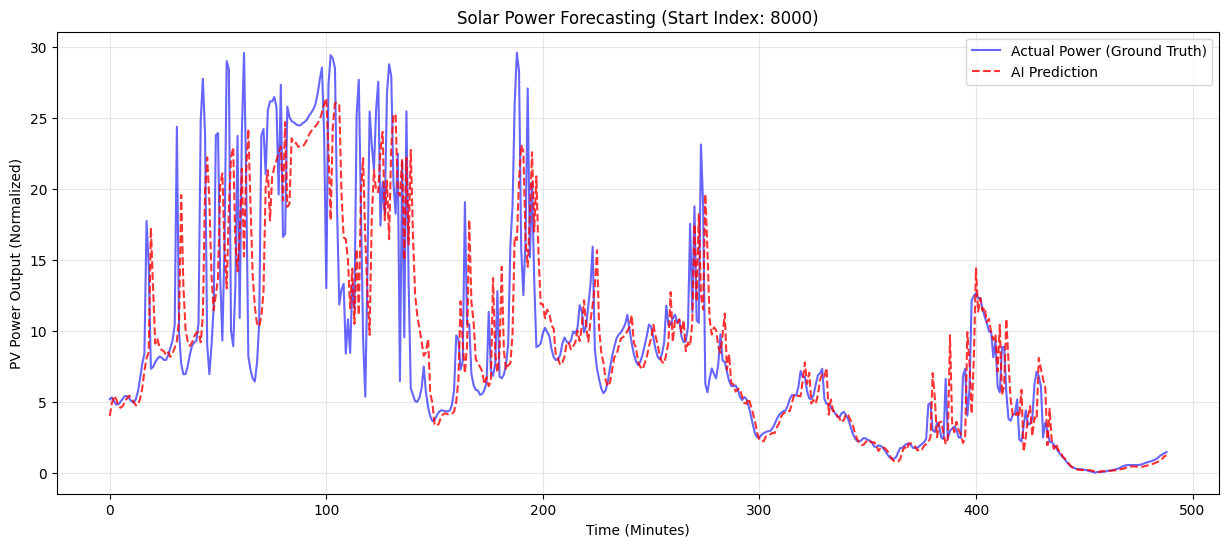


[성능 평가]
평균 오차(MAE): 2.6136
제곱근 오차(RMSE): 4.5203
🧪 테스트 데이터를 불러옵니다... (구간: 8500 ~ 9000)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


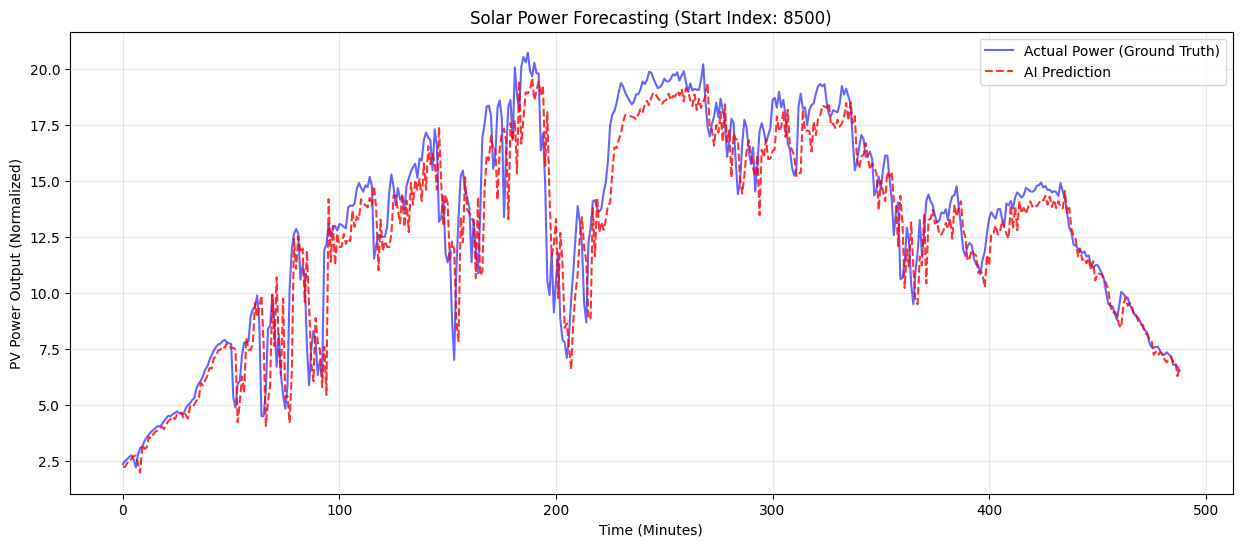


[성능 평가]
평균 오차(MAE): 1.1174
제곱근 오차(RMSE): 1.6092
🧪 테스트 데이터를 불러옵니다... (구간: 9000 ~ 9500)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


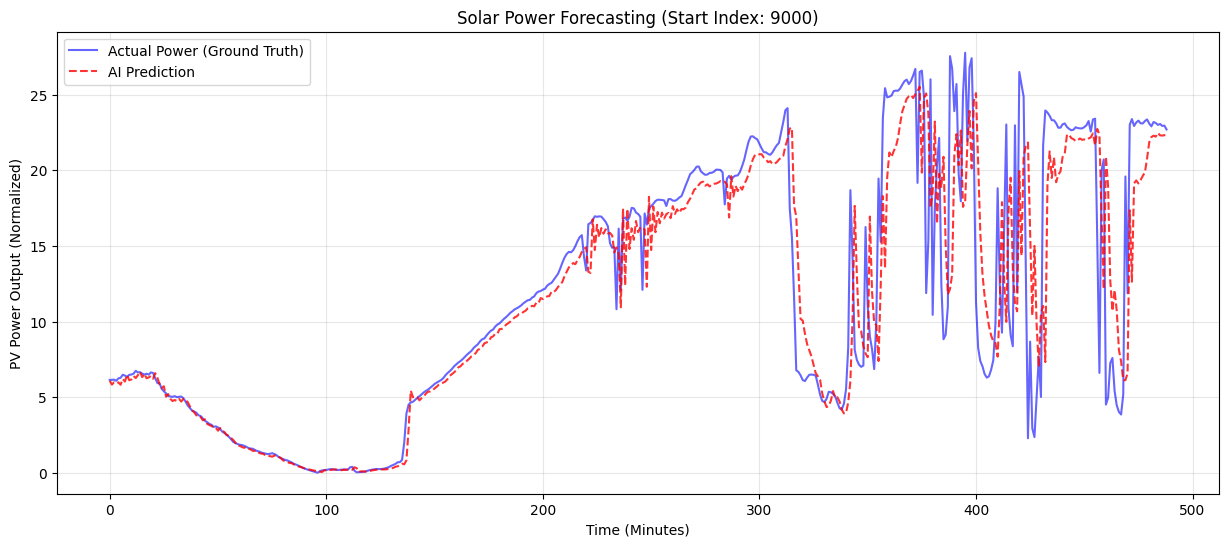


[성능 평가]
평균 오차(MAE): 2.0215
제곱근 오차(RMSE): 3.8011
🧪 테스트 데이터를 불러옵니다... (구간: 9500 ~ 10000)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


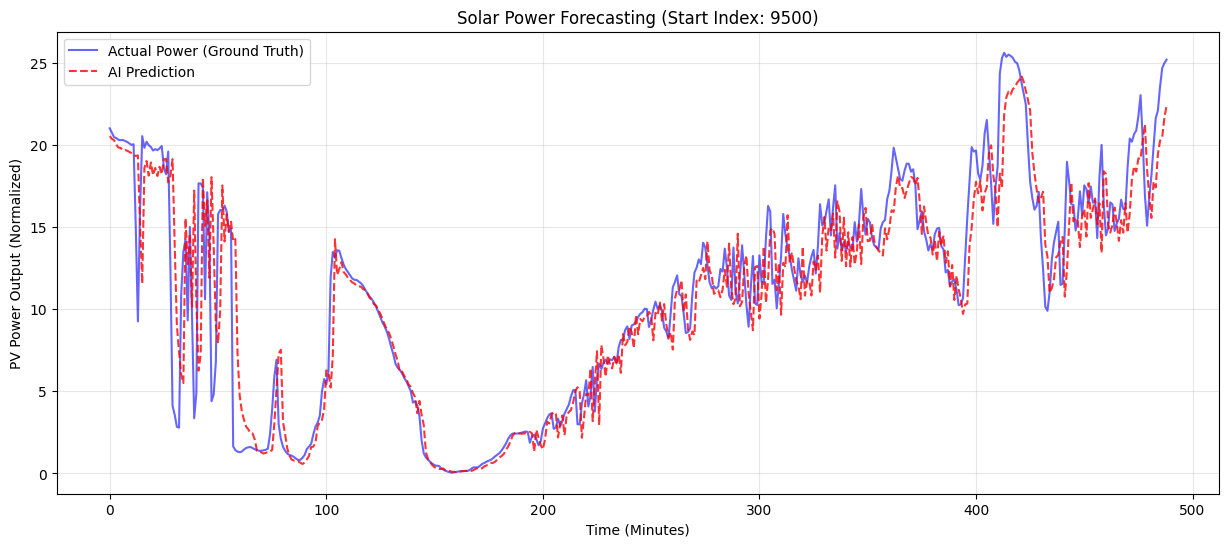


[성능 평가]
평균 오차(MAE): 1.6097
제곱근 오차(RMSE): 2.6843
🧪 테스트 데이터를 불러옵니다... (구간: 10000 ~ 10500)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


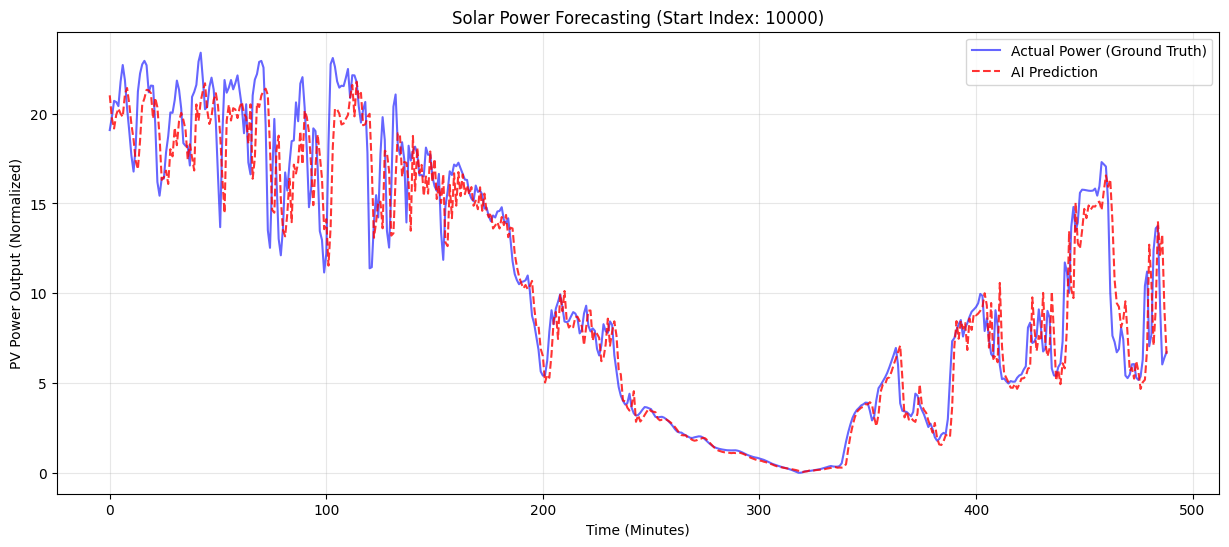


[성능 평가]
평균 오차(MAE): 1.3125
제곱근 오차(RMSE): 2.0478
🧪 테스트 데이터를 불러옵니다... (구간: 10500 ~ 11000)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


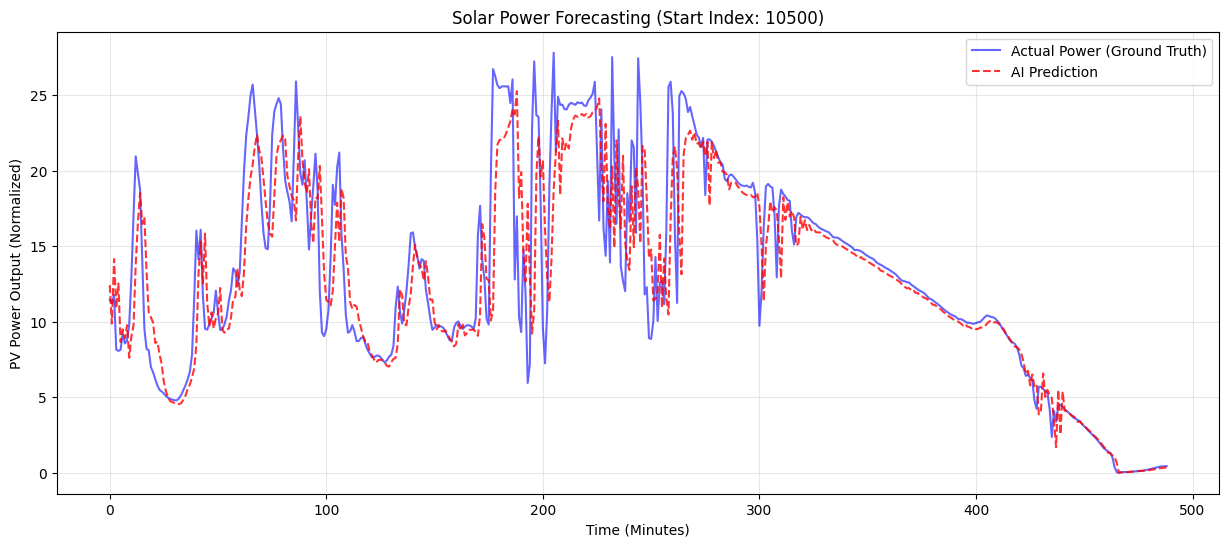


[성능 평가]
평균 오차(MAE): 1.9440
제곱근 오차(RMSE): 3.3352
🧪 테스트 데이터를 불러옵니다... (구간: 11000 ~ 11500)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


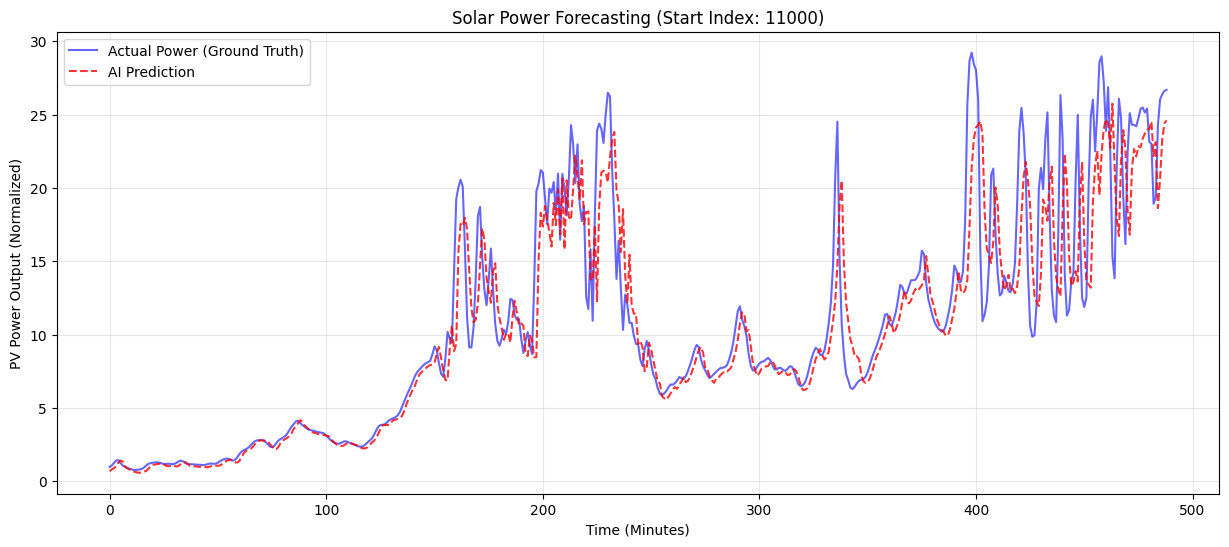


[성능 평가]
평균 오차(MAE): 1.8300
제곱근 오차(RMSE): 3.1470
🧪 테스트 데이터를 불러옵니다... (구간: 11500 ~ 12000)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


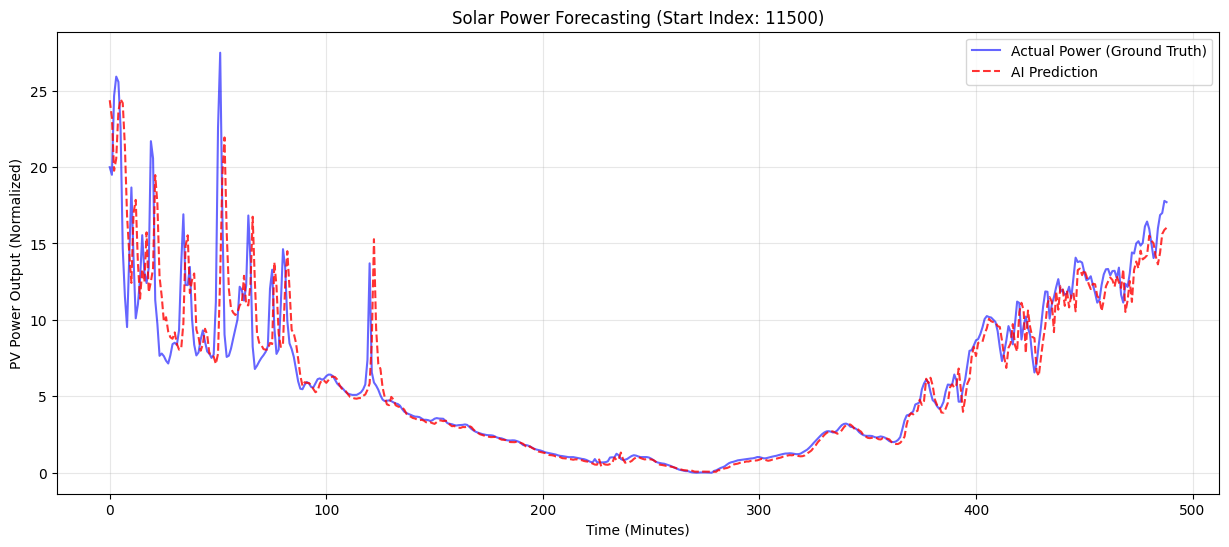


[성능 평가]
평균 오차(MAE): 1.0052
제곱근 오차(RMSE): 2.1904
🧪 테스트 데이터를 불러옵니다... (구간: 12000 ~ 12500)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


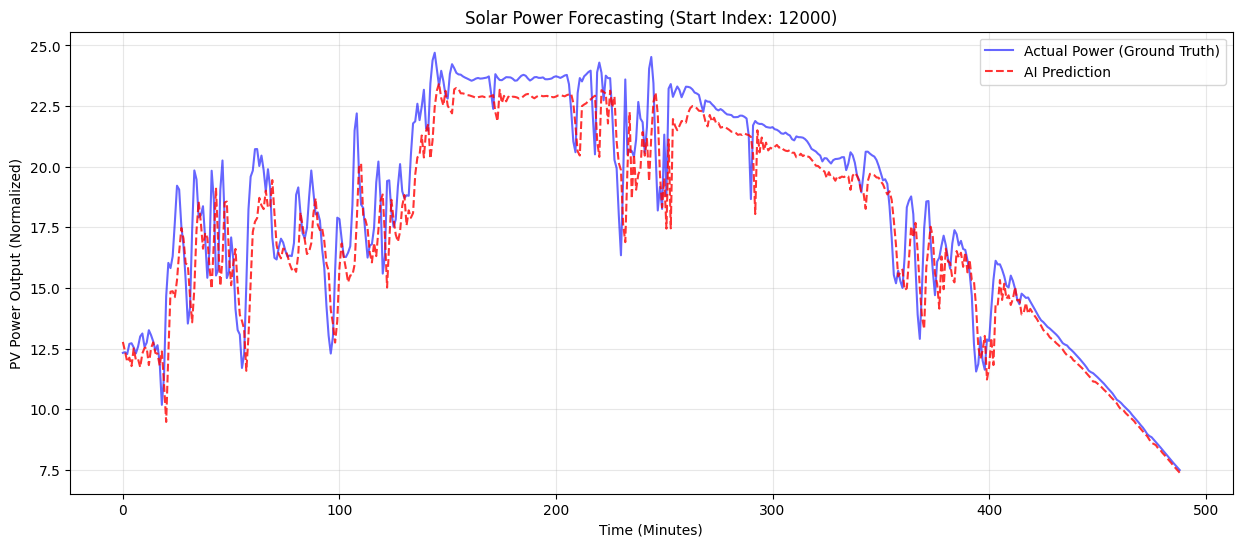


[성능 평가]
평균 오차(MAE): 1.0884
제곱근 오차(RMSE): 1.5497
🧪 테스트 데이터를 불러옵니다... (구간: 12500 ~ 13000)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


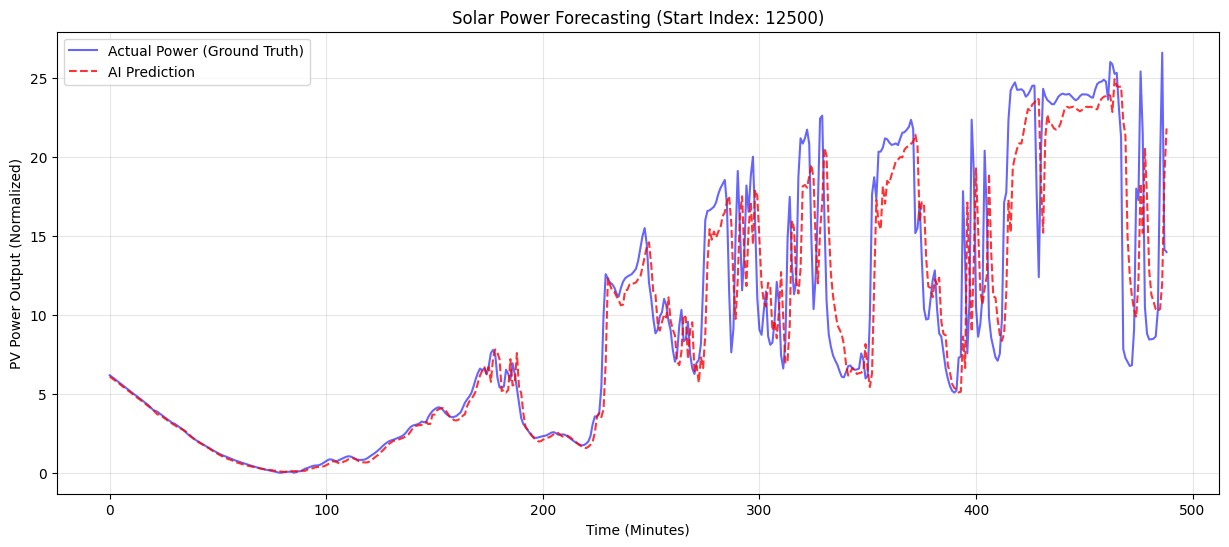


[성능 평가]
평균 오차(MAE): 1.7278
제곱근 오차(RMSE): 3.1060
🧪 테스트 데이터를 불러옵니다... (구간: 13000 ~ 13500)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


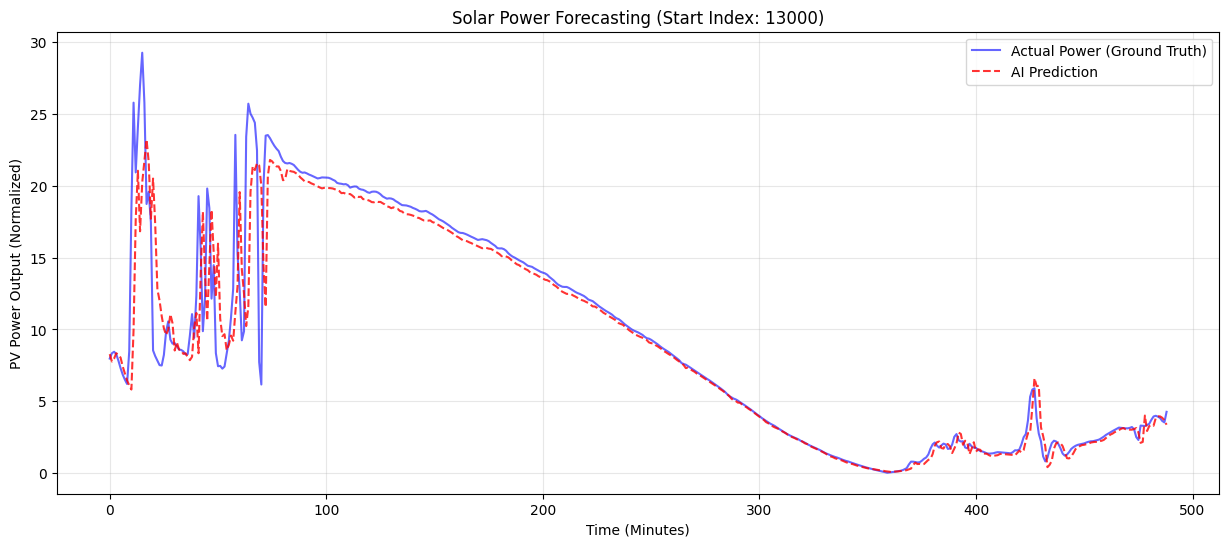


[성능 평가]
평균 오차(MAE): 0.9082
제곱근 오차(RMSE): 2.3706
🧪 테스트 데이터를 불러옵니다... (구간: 13500 ~ 14000)
데이터를 시계열로 변환 중...
테스트 데이터 형태: (489, 10, 64, 64, 3)
🔮 미래 발전량을 예측하고 있습니다...
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
📊 그래프를 그립니다...


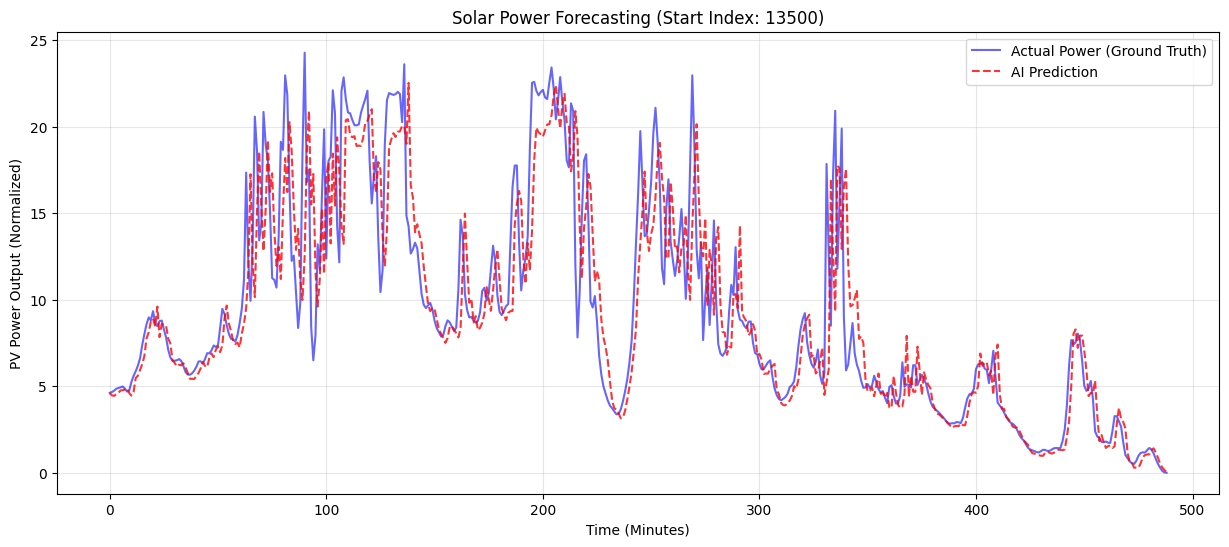


[성능 평가]
평균 오차(MAE): 1.9002
제곱근 오차(RMSE): 3.0197


In [ ]:
# [Step 5] (수정됨) 테스트 데이터로 예측 성능 확인하기
# 이 코드를 다섯 번째 셀에 넣고 실행하세요.

import matplotlib.pyplot as plt
import numpy as np
import h5py

for i in range(14):
    # ---------------------------------------------------------
    # 1. 테스트 데이터 준비 (원하는 구간 선택 가능)
    # ---------------------------------------------------------
    TEST_SIZE = 500    # 테스트할 데이터 개수 (예: 1000개)
    START_IDX = 7000 + i*500    # ★ 데이터 시작 위치 (0이면 맨 처음, 5000이면 5000번째부터)
                        # 이 숫자를 바꾸면 다른 시간대의 데이터를 테스트할 수 있습니다.

    SEQ_LENGTH = 10     # Step 4에서 설정한 것과 같아야 함
    target_file = '2017_2019_images_pv_processed.hdf5'

    print(f"🧪 테스트 데이터를 불러옵니다... (구간: {START_IDX} ~ {START_IDX + TEST_SIZE})")

    if 'model' not in locals():
        print("⚠️ 오류: 'model'이 없습니다. Step 4를 먼저 실행해서 모델을 학습시켜주세요!")
    else:
        # 테스트용 시퀀스 생성 함수 (Step 4에서 사라졌으므로 여기에 다시 정의)
        def create_test_sequences(img_data, num_data, seq_length, prediction_horizon=1):
            xs_img, xs_num, ys = [], [], []
            for i in range(len(img_data) - seq_length - prediction_horizon):
                xs_img.append(img_data[i : i+seq_length])
                xs_num.append(num_data[i : i+seq_length])
                ys.append(num_data[i + seq_length + prediction_horizon])
            return np.array(xs_img), np.array(xs_num), np.array(ys)

        with h5py.File(target_file, 'r') as f:
            # test 그룹에서 데이터 가져오기 (START_IDX 부터 가져오도록 수정)
            # 데이터 전체 길이를 확인하고 범위를 넘지 않게 주의하세요.
            total_test_len = f['test']['images_log'].shape[0]

            if START_IDX + TEST_SIZE > total_test_len:
                print(f"⚠️ 주의: 요청한 범위가 데이터 끝을 넘었습니다. (최대 {total_test_len}개)")

            X_img_test_raw = f['test']['images_log'][START_IDX : START_IDX + TEST_SIZE]
            X_num_test_raw = f['test']['pv_log'][START_IDX : START_IDX + TEST_SIZE]

            # 정규화
            X_img_test_raw = X_img_test_raw.astype('float32') / 255.0
            X_num_test_raw = X_num_test_raw.reshape(-1, 1)

        # 시퀀스 데이터 생성
        print("데이터를 시계열로 변환 중...")
        X_test_img, X_test_num, y_test = create_test_sequences(X_img_test_raw, X_num_test_raw, SEQ_LENGTH)
        print(f"테스트 데이터 형태: {X_test_img.shape}")

        # ---------------------------------------------------------
        # 2. AI에게 예측 시키기
        # ---------------------------------------------------------
        print("🔮 미래 발전량을 예측하고 있습니다...")
        y_pred = model.predict([X_test_img, X_test_num])

        # ---------------------------------------------------------
        # 3. 결과 비교 그래프 그리기
        # ---------------------------------------------------------
        print("📊 그래프를 그립니다...")

        plt.figure(figsize=(15, 6))

        # 실제값 (파란색)
        plt.plot(y_test, label='Actual Power (Ground Truth)', color='blue', alpha=0.6)

        # 예측값 (빨간색 점선)
        plt.plot(y_pred, label='AI Prediction', color='red', linestyle='--', alpha=0.8)

        plt.title(f'Solar Power Forecasting (Start Index: {START_IDX})')
        plt.xlabel('Time (Minutes)')
        plt.ylabel('PV Power Output (Normalized)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

        # ---------------------------------------------------------
        # 4. 성능 평가 (RMSE, MAE)
        # ---------------------------------------------------------
        from sklearn.metrics import mean_absolute_error, mean_squared_error

        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))

        print(f"\n[성능 평가]")
        print(f"평균 오차(MAE): {mae:.4f}")
        print(f"제곱근 오차(RMSE): {rmse:.4f}")